In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [7]:
df['Gender'] = df['Gender'].str.replace('Fe Male','Female')  #need to rectify

In [8]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
#Percentage of null values
round(100*(df.isnull().sum()/len(df.index)),2)

CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

#1. Understanding Customer Demographics

Problem Statement: Analyze the demographics of customers interested in travel products to identify key characteristics.

In [12]:
#Age Distribution:

age_counts = df['Age'].value_counts()

35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64

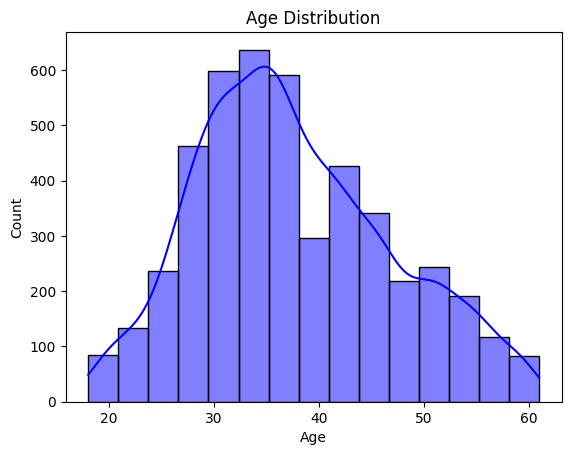

In [34]:
# Age distribution plot
sns.histplot(df.Age,bins=15,kde=True,color='blue')
plt.title('Age Distribution')
plt.show()

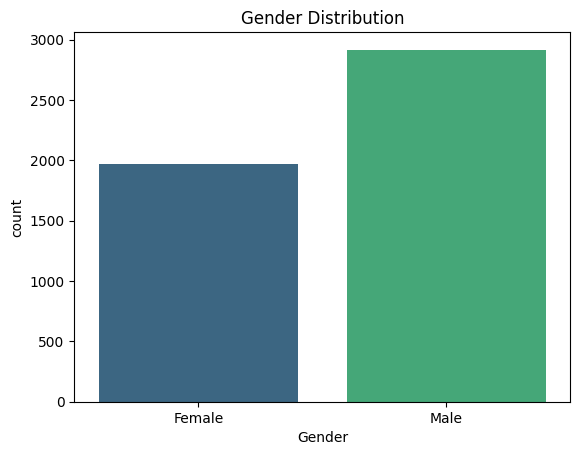

In [33]:
#Gender Distribution:
sns.countplot(x=df.Gender,palette='viridis')
plt.title("Gender Distribution")
plt.show()

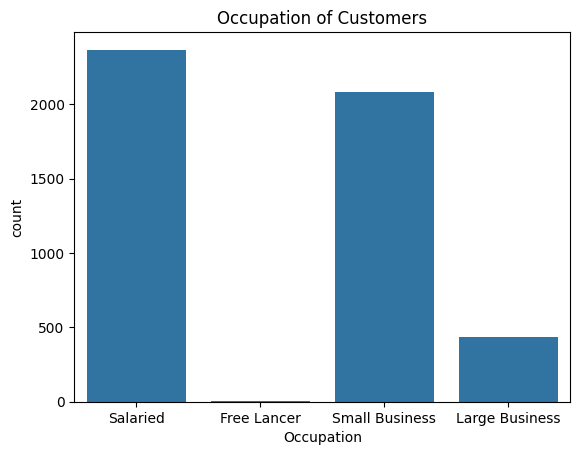

In [36]:
#Occupation Distribution:
sns.countplot(data=df, x='Occupation').set_title('Occupation of Customers')
plt.show()

#2. Analyzing Customer Engagement

Problem Statement: Evaluate how customer engagement metrics relate to product uptake.

In [67]:
df.ProdTaken.unique()

array([1, 0])

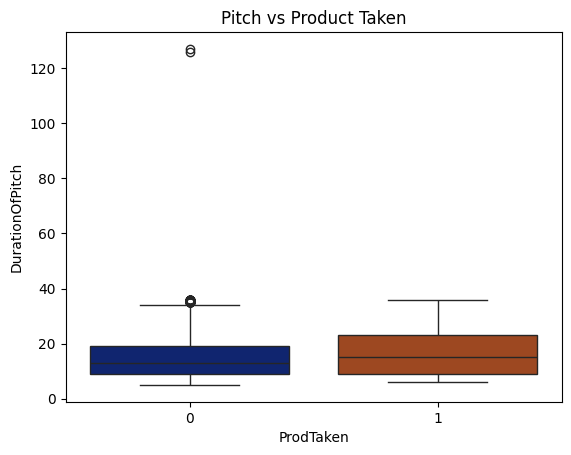

In [49]:
#Duration of Pitch vs. Product Taken:

sns.boxplot(y='DurationOfPitch', x ='ProdTaken',data=df,palette='dark').set_title('Pitch vs Product Taken')
plt.show()

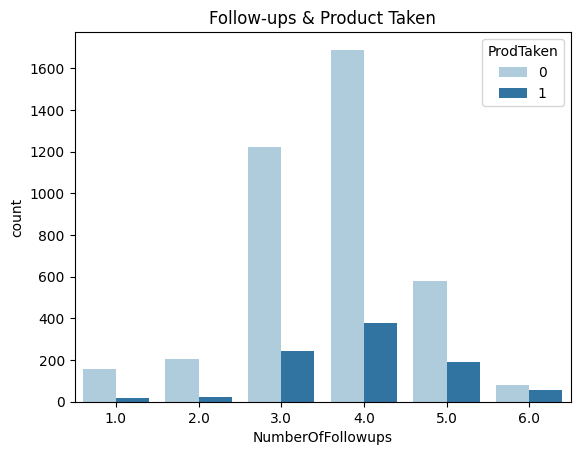

In [66]:
# Number of Follow-ups and Product Taken:

sns.countplot(data=df, x='NumberOfFollowups', hue='ProdTaken',palette='Paired').set_title('Follow-ups & Product Taken')
plt.show()

<Axes: xlabel='PitchSatisfactionScore', ylabel='NumberOfFollowups'>

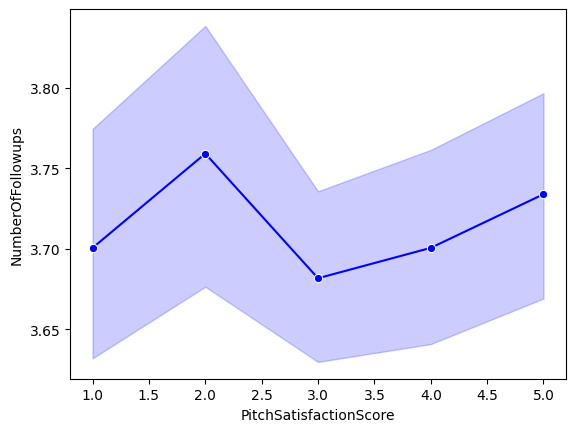

In [79]:
sns.lineplot(x='PitchSatisfactionScore',y='NumberOfFollowups',data=df,color='blue',marker='o')

#3. Exploring Travel Preferences

Problem Statement: Identify preferences and patterns in travel product choices among customers.

In [69]:
df.PreferredPropertyStar.unique()

array([ 3.,  4.,  5., nan])

Text(0.5, 1.0, 'Preferred Property Star Rating')

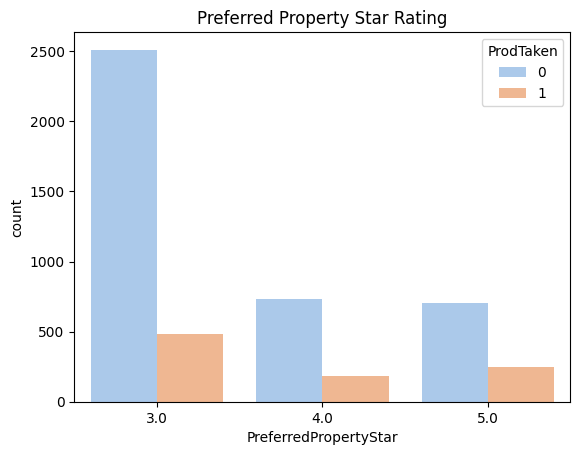

In [78]:
#Preferred Property Star Rating:
sns.countplot(data=df, x='PreferredPropertyStar',hue='ProdTaken',palette='pastel').set_title('Preferred Property Star Rating')

#4. Customer Financial Insights

Problem Statement: Investigate the financial background of customers to see how it influences product choice.

Text(0.5, 1.0, 'Monthly Income Distribution')

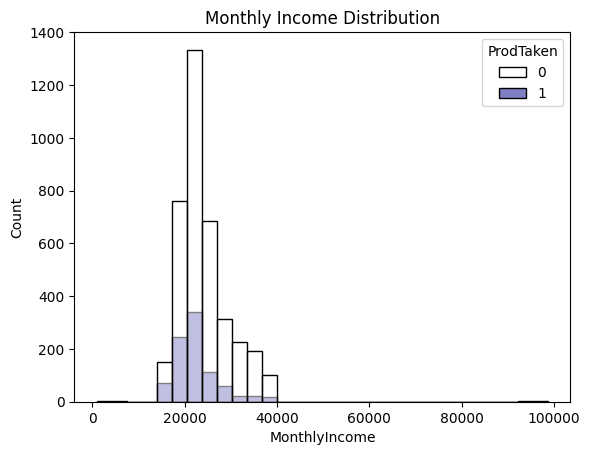

In [96]:
#Monthly Income Distribution:

sns.histplot(x=df.MonthlyIncome,bins=30,hue=df.ProdTaken,palette={1:'darkblue',0:'white'},fill=True).set_title('Monthly Income Distribution')

#5. Travel Behaviors

Problem Statement: Analyze travel behaviors and their impact on product selection.

In [97]:
df.NumberOfTrips.unique()

array([ 1.,  2.,  7.,  5.,  6.,  3.,  4., 19., 21.,  8., nan, 20., 22.])

In [103]:
df.NumberOfTrips = df.NumberOfTrips.replace(np.nan,0)   #replaced nan values to 0

Text(0.5, 1.0, 'Number of Trips Distribution')

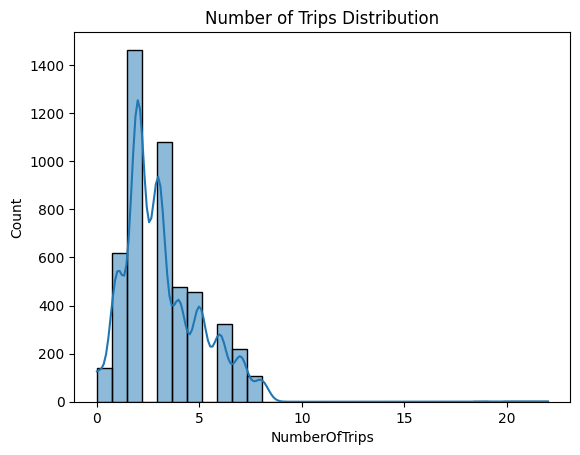

In [105]:
#Number of Trips Distribution:
sns.histplot(data=df, x='NumberOfTrips', bins=30, kde=True).set_title('Number of Trips Distribution')

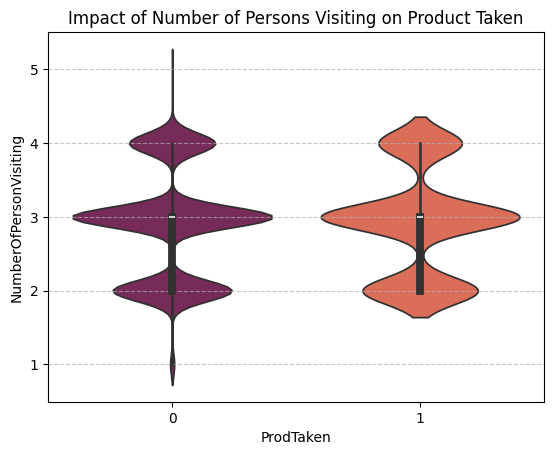

In [120]:
# Number of Persons Visiting vs. Product Taken:
sns.violinplot(data=df, y='NumberOfPersonVisiting', x='ProdTaken',palette='rocket').set_title('Impact of Number of Persons Visiting on Product Taken')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Relationship Insights

Problem Statement: Understand the relationship status of customers and its influence on travel product uptake.

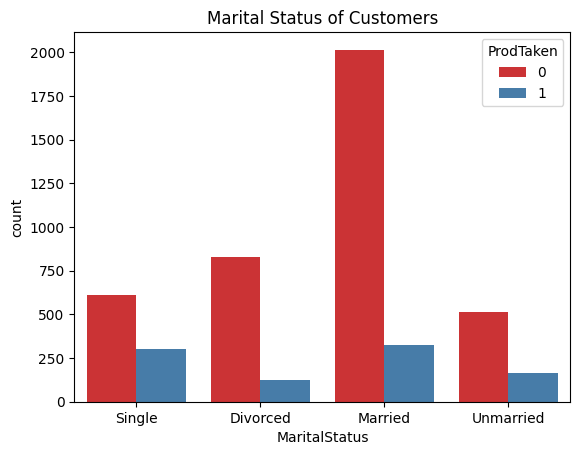

In [130]:
#Marital Status Distribution:
sns.countplot(data=df, x='MaritalStatus',hue='ProdTaken',palette='Set1').set_title('Marital Status of Customers')
plt.show()

# Miscellaneous Analysis

In [131]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='Designation', ylabel='count'>

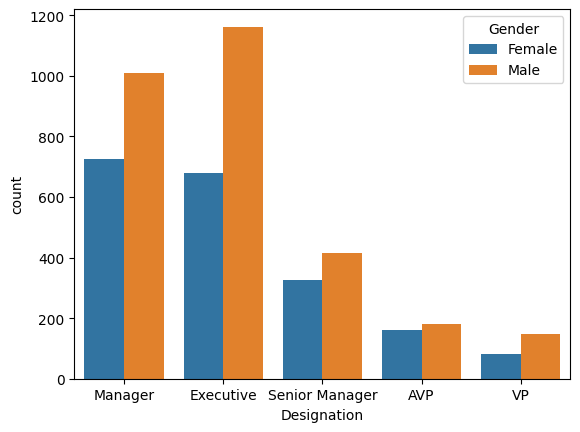

In [138]:
sns.countplot(x='Designation',hue='Gender',data=df)

<Axes: >

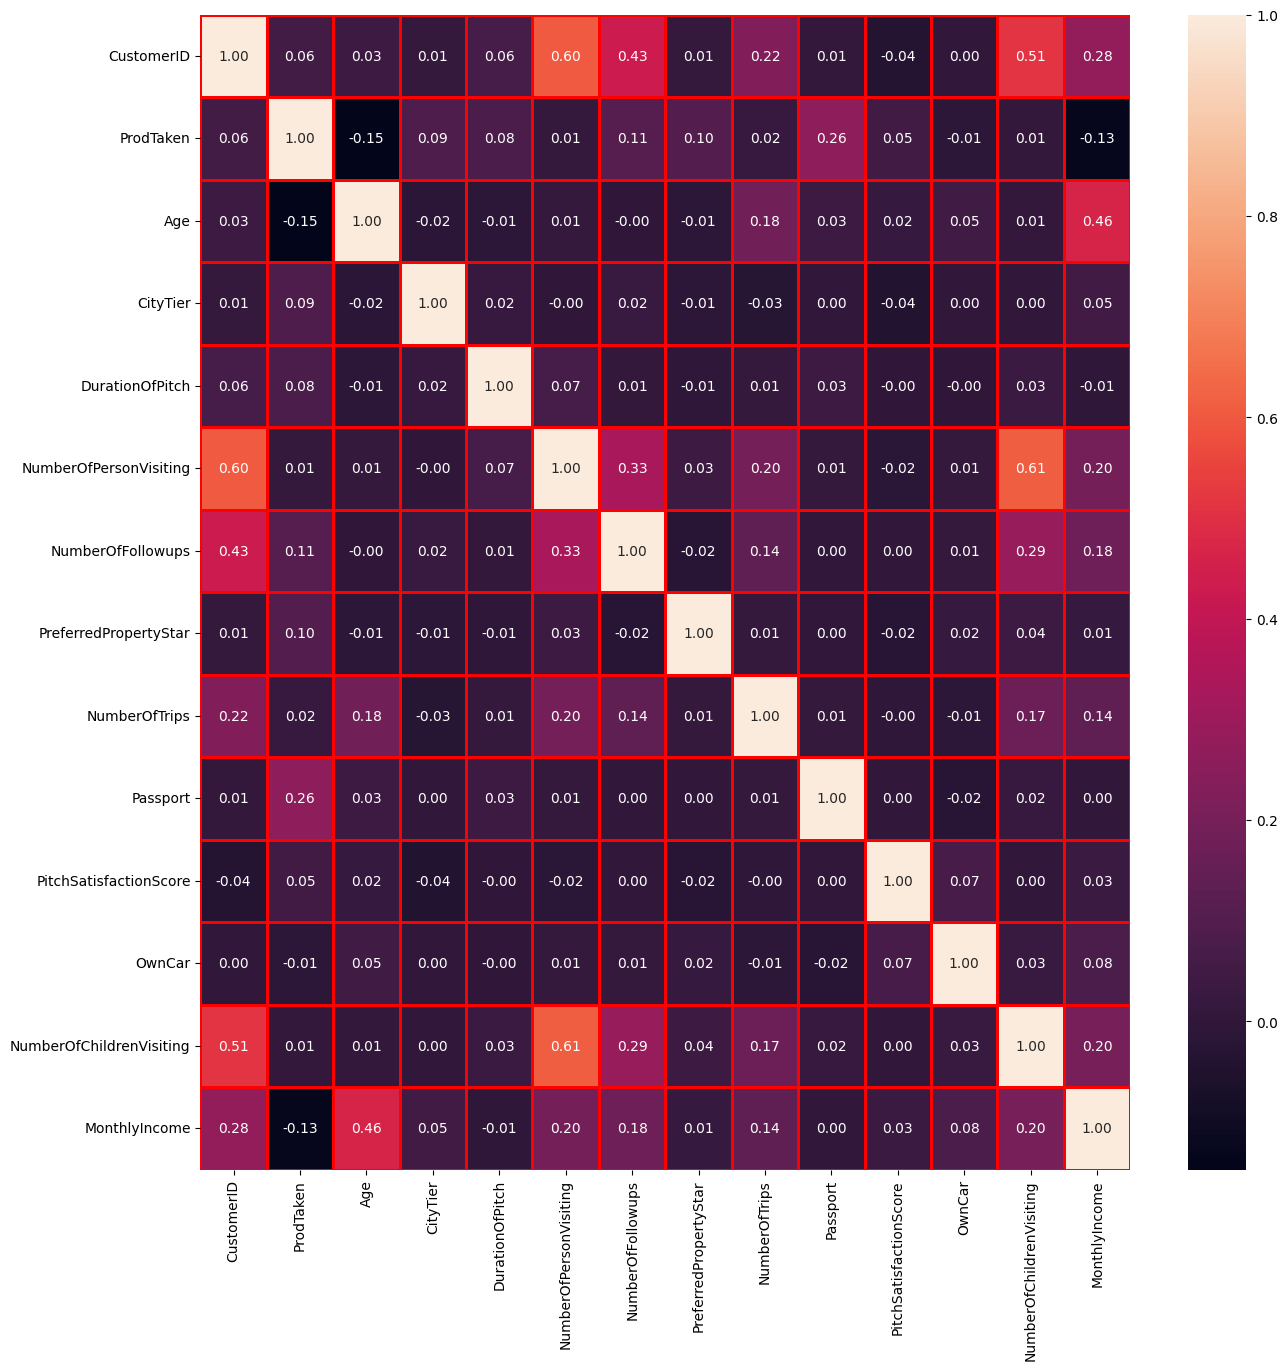

In [82]:
#heat map
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),ax=ax,annot=True,fmt='.2f',linewidth=2,linecolor='red')

#Descriptive Statistics

In [148]:
# Calculate the mean, median, and standard deviation of the 'MonthlyIncome' column

pd.DataFrame(round(df.MonthlyIncome.describe(),2)).reset_index().rename(columns={'index':'Stats'}).set_index('Stats')

,MonthlyIncome
Stats,
count,4655.00
mean,23619.85
std,5380.70
min,1000.00
25%,20346.00
50%,22347.00
75%,25571.00
max,98678.00


In [154]:
#Identify customers with a monthly income above a certain threshold (e.g., $10,000) and create a new DataFrame with only these
#high-income customers.

df_high_income = df[df.MonthlyIncome >=10000].loc[:,['CustomerID','Age','Gender','Designation','MonthlyIncome']].set_index('CustomerID').sort_values('MonthlyIncome')
df_high_income

,Age,Gender,Designation,MonthlyIncome
CustomerID,,,,
200513,20.0,Male,Executive,16009.0
201983,20.0,Male,Executive,16009.0
202197,18.0,Male,Executive,16051.0
200727,18.0,Male,Executive,16051.0
202234,28.0,Male,Executive,16052.0
...,...,...,...,...
203190,42.0,Female,VP,38651.0
202634,53.0,Male,VP,38677.0
204104,53.0,Male,VP,38677.0


In [177]:
# Calculate the percentage of customers who took a product (ProdTaken) for each gender.

(df[df['ProdTaken']==1]['Gender'].value_counts(normalize=True))*100

Male      62.826087
Female    37.173913
Name: Gender, dtype: float64

In [188]:
#Identify the most common occupation among the customers.

df.Occupation.value_counts().sort_values(ascending=False).idxmax()

'Salaried'

                    Age  MonthlyIncome
Age            1.000000       0.464869
MonthlyIncome  0.464869       1.000000



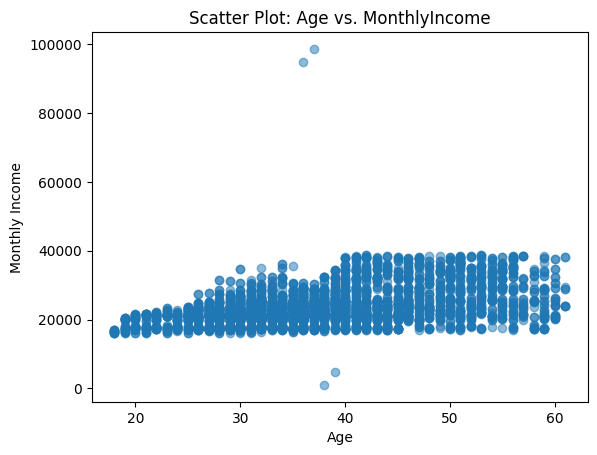

In [194]:
#Explore the correlation between 'Age' and 'MonthlyIncome'. Visualize the relationship using a scatter plot.

print(df.loc[:,['Age','MonthlyIncome']].corr())
print()
# Visualize the relationship using a scatter plot
plt.scatter(df['Age'], df['MonthlyIncome'], alpha=0.5)
plt.title('Scatter Plot: Age vs. MonthlyIncome')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

In [197]:
#Calculate the average number of trips (NumberOfTrips) for each marital status (MaritalStatus)

round(df.groupby('MaritalStatus')['NumberOfTrips'].mean())

MaritalStatus
Divorced     3.0
Married      3.0
Single       3.0
Unmarried    3.0
Name: NumberOfTrips, dtype: float64

In [201]:
#Identify the most preferred property star rating (PreferredPropertyStar) among customers.

df.PreferredPropertyStar.value_counts().idxmax()

3.0